Assignment: Simple Linear Regression 2

In [44]:
#Libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
#model Library

import statsmodels.formula.api as smf

In [46]:
#For uploading the file

from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [47]:
#Importing the Data

data = pd.read_csv("Salary_Data.csv")

# EDA and DATA visualisation

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.shape

(30, 2)

In [ ]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


This Data does not contain any NULL values
So, there is no need of trating the data.

<ipython-input-50-f0f3c37637f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

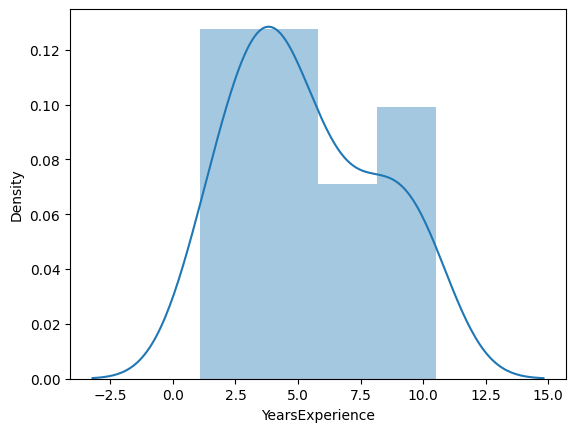

In [50]:
sns.distplot(data['YearsExperience'])

<ipython-input-51-10b07b01fa97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

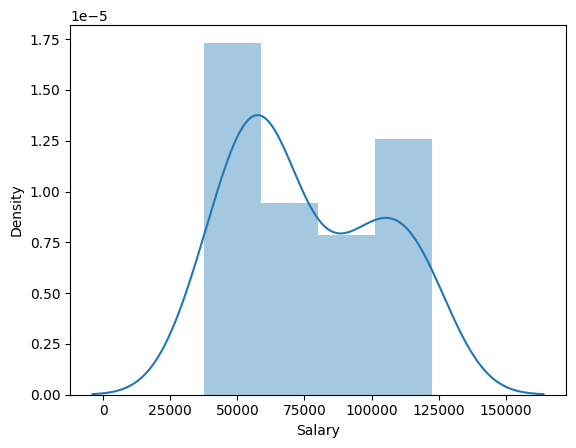

In [51]:
sns.distplot(data['Salary'])

# Checking Correlation

In [53]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000



This graph will show us the line of best fit where x is years of experience and the y is salary

<Axes: xlabel='YearsExperience', ylabel='Salary'>

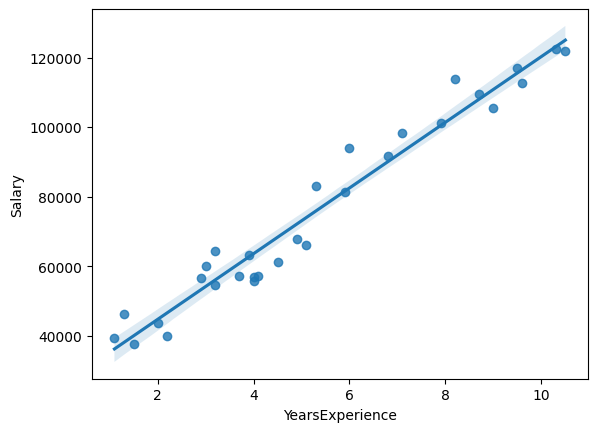

In [52]:
sns.regplot(x="YearsExperience", y = "Salary", data = data)

## Model Building



* salary is the dependent variable and Years Experience is the independent variable
*  Because salary depends on the years of experience





Model Fitting

Fiiting the model as X : years Experience  Y : salary

In [54]:
model = smf.ols("Salary~YearsExperience", data = data).fit()

here we are using cost function Ordinary least square(ols) and we areging the target variable and the independent variables. and fitting them into the model

In [55]:
#Coefficint Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [56]:
#Rsquared Values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

## Predicting for new data

In [57]:
#Manual Calculation

Salary = (25792.200199) + (9449.962321)*(3.3)
Salary

56977.0758583

In [59]:
# Adding and Predicting for New Data

new_data = pd.Series([2.2, 3.3, 12.4])

In [60]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,2.2
1,3.3
2,12.4


In [61]:
model.predict(data_pred)

0     46582.117306
1     56977.075859
2    142971.732985
dtype: float64